In [2]:
import pandas as pd
SELECT_COLUMN = [1,2,4,6,11] # We only consider price, date of the purchase, property type, lease duration and town
df = pd.read_csv("data/pp-complete.csv", names=["price", "date", "ptype", "duration", "town"], sep=",", usecols=SELECT_COLUMN)

In [3]:
# Data Preprocessing
# for c in ['duration', 'ptype']:
#     df[c] = df[c].astype('category')
#     df[c] = df[c].cat.codes
df['isLondon'] = [1 if i == "LONDON" else 0 for i in df['town']]
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')
df["year"] = df['date'].dt.year

# remove rows with missing values
df = df.dropna()
# remove duplicate rows
df = df.drop_duplicates()
# delete unknown for duration


In [5]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder()

In [ ]:
df[(df.price > 1) & (df.price <=40000)].hist("price")

In [153]:
sdf = df[(df.price > 100000) & (df.price <=500000)]

In [10]:
enc.fit(df[['ptype', 'duration', 'isLondon']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [154]:
# Split the data into training/testing sets
def split_train_test_data(df):
    df_train = df[df.date < "2016-1-1"]
    df_test = df[df.date >= "2016-1-1"]
#     df_test = df_test[df.date < "2017-1-1"]
    x_train = enc.transform(df_train[['ptype', 'duration', 'isLondon']]).toarray()
    y_train = df_train['price'].values

    x_test = enc.transform(df_test[['ptype', 'duration', 'isLondon']]).toarray()
    y_test = df_test['price'].values
    
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = split_train_test_data(sdf)

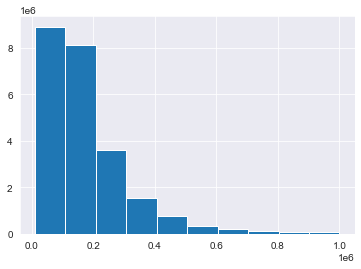

In [140]:
df.price.hist(range=(100000,1000000))

In [143]:
sdf = df[(df.price >= 10000) & (df.price <= 1000000)]

1000000

In [12]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import numpy as np

In [13]:
x_test.shape, x_train.shape

((3970889, 10), (20020257, 10))

In [23]:
print('RMSLE: %f'
      % sqrt(mean_squared_log_error(y_test, [0]*len(y_test))))

RMSLE: 12.343969


In [155]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from math import sqrt
# Create linear regression model
model = linear_model.LinearRegression()
# Train the model using the training set
model.fit(x_train, y_train)
# Make predictions using the testing set
y_pred = model.predict(x_test)
# The mean squared error
print('MAE: %f'
      % mean_absolute_error(y_test, y_pred))



MAE: 79683.155463


In [156]:
mean_absolute_error(y_test, y_pred)

79683.15546306327

In [150]:
y_pred

array([275036., 275036., 275036., ..., 117918., 140550., 117918.])

In [79]:
from sklearn.metrics import mean_absolute_error

In [81]:
for i in [(0, 100), (100, 1000), (1000,10000), (10000, 100000), (100000, 1000000), (1000000, 10000000), (10000000, 100000000)]:
    y_t, y_p = [], []
    for t, p in zip(y_test, y_pred):
        if i[0] < t < i[1]:
            y_t.append(t)
            y_p.append(p)
    print(y_t[:10])
    print(y_p[:10])
    print(i, len(y_t), 'MAE: %f'
      % mean_absolute_error(y_t, y_p))
#     break


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[107384.0, 118720.0, 107384.0, 81200.0, 107384.0, 107384.0, 141480.0, 107384.0, 107384.0, 204224.0]
(0, 100) 14 MAE: 125027.571429
[150, 500, 300, 500, 927, 500, 500, 550, 600, 320]
[1694296.0, 1694296.0, 1694296.0, 1656776.0, 1694296.0, 1694296.0, 1694296.0, 1694296.0, 1694296.0, 1694296.0]
(100, 1000) 2957 MAE: 1675086.775786
[2235, 5000, 5000, 4850, 4000, 9000, 6500, 7500, 8000, 7000]
[1694296.0, 1656776.0, 1694296.0, 1694296.0, 1694296.0, 1656776.0, 1694296.0, 1656776.0, 1694296.0, 1656776.0]
(1000, 10000) 11608 MAE: 1691302.772226
[95000, 75000, 60000, 45000, 63000, 67950, 89000, 50000, 76000, 77000]
[81200.0, 107384.0, 107384.0, 363472.0, 107384.0, 107384.0, 107384.0, 107384.0, 107384.0, 107384.0]
(10000, 100000) 429680 MAE: 214653.740982
[385000, 540000, 805000, 830000, 213000, 215000, 220000, 212500, 335000, 435000]
[363472.0, 363472.0, 363472.0, 363472.0, 107384.0, 118720.0, 107384.0, 118720.0, 118720.0, 241744.0]
(100000, 1000000) 3397636 MAE: 1

In [76]:
y_t

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [77]:
y_p

[107384.0,
 118720.0,
 107384.0,
 81200.0,
 107384.0,
 107384.0,
 141480.0,
 107384.0,
 107384.0,
 204224.0,
 204224.0,
 107384.0,
 103960.0,
 144904.0]

In [74]:
for i in [(0, 100), (100, 1000),(0,10000), (10000, 100000), (100000, 1000000), (1000000, 10000000), (10000000, 100000000)]:
    y_t, y_p = [], []
    for t in df.price.values:
        if i[0] < t < i[1]:
            y_t.append(t)
    print(i, len(y_t))



(0, 100) 148
(100, 1000) 3927


KeyboardInterrupt: 

In [47]:
Y = 100000
import numpy as np
Y = np.log1p(Y)
back = np.expm1(Y)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble

# model = DecisionTreeRegressor()

# Fit regression model
params = {'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

# Train the model using the training set
model.fit(x_train, y_train)
# Make predictions using the testing set
y_pred = model.predict(x_test)
# The mean squared error
print('RMSLE: %f'
      % sqrt(mean_squared_log_error(y_test, y_pred)))



In [24]:
print('RMSLE: %f'
      % sqrt(mean_squared_log_error(y_test, [y_test.mean()] * len(y_test))))

RMSLE: 0.893618


In [25]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso.fit(x_train, y_train)


In [95]:
import keras
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras import backend as K


# def rmsle_error(y_true, y_pred): 
#     return K.sqrt(K.mean(K.square(K.log(y_pred) - K.log(y_true))))
#     return K.sqrt(mean_squared_log_error(y_true, y_pred))

def rmsle_error(y_true, y_pred):
        return K.mean(K.square(y_pred - y_true), axis=-1)
# define the model
def baseline():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
#     model.compile(loss='mean_squared_error', optimizer='adam')
    model.compile(loss=rmsle_error, optimizer='adam')
    return model
# model = baseline()
for i in range(10):
    model.fit(x_train, y_train, batch_size=256, shuffle=False)
    y_pred = model.predict(x_test, batch_size=256)
    print('RMSLE: %f'
      % sqrt(mean_squared_log_error(y_test, y_pred)))
    print('MAE: %f'
      % mean_absolute_error(np.expm1(y_test), np.expm1(y_pred)))
#     print('Mean squared error: %.2f'
#           % mean_squared_error(y_train, y_pred))

Epoch 1/1
20020257/20020257 [==============================] - 53s 3us/step - loss: 0.2921
RMSLE: 0.056858
MAE: 175575.207359
Epoch 1/1
20020257/20020257 [==============================] - 55s 3us/step - loss: 0.2921
RMSLE: 0.056860
MAE: 175582.541121
Epoch 1/1
20020257/20020257 [==============================] - 55s 3us/step - loss: 0.2921
RMSLE: 0.056861
MAE: 175582.851511
Epoch 1/1
20020257/20020257 [==============================] - 53s 3us/step - loss: 0.2921
RMSLE: 0.056863
MAE: 175578.036486
Epoch 1/1
20020257/20020257 [==============================] - 52s 3us/step - loss: 0.2921
RMSLE: 0.056865
MAE: 175572.560000
Epoch 1/1
20020257/20020257 [==============================] - 53s 3us/step - loss: 0.2921
RMSLE: 0.056868
MAE: 175565.963887
Epoch 1/1
20020257/20020257 [==============================] - 58s 3us/step - loss: 0.2921
RMSLE: 0.056870
MAE: 175559.147408
Epoch 1/1
20020257/20020257 [==============================] - 57s 3us/step - loss: 0.2921
RMSLE: 0.056871
MAE: 175551

In [157]:
model = baseline()
for i in range(5):
    model.fit(x_train, y_train, batch_size=256, shuffle=False)
    y_pred = model.predict(x_test, batch_size=256)
    print('RMSLE: %f'
      % sqrt(mean_squared_log_error(y_test, y_pred)))
    print('MAE: %f'
      % mean_absolute_error(y_test, y_pred))
#     print('Mean squared error: %.2f'
#           % mean_squared_error(y_train, y_pred))

Epoch 1/1
11551361/11551361 [==============================] - 31s 3us/step - loss: 31804297335.8376
RMSLE: 0.686232
MAE: 117242.018413
Epoch 1/1
11551361/11551361 [==============================] - 32s 3us/step - loss: 6822847129.9592
RMSLE: 0.388542
MAE: 76978.373664
Epoch 1/1
11551361/11551361 [==============================] - 32s 3us/step - loss: 6655029727.5402
RMSLE: 0.383031
MAE: 75521.576557
Epoch 1/1
11551361/11551361 [==============================] - 32s 3us/step - loss: 6751157751.3659
RMSLE: 0.381830
MAE: 75148.608910
Epoch 1/1
11551361/11551361 [==============================] - 33s 3us/step - loss: 6798831021.4163
RMSLE: 0.381335
MAE: 75035.865465


In [ ]:
MAE: 79683.155463


In [ ]:
Epoch 1/1
20020257/20020257 [==============================] - 54s 3us/step - loss: 0.5681
RMSLE: 0.057025
MAE: 175876.799448
Epoch 1/1
20020257/20020257 [==============================] - 53s 3us/step - loss: 0.2922
RMSLE: 0.056899
MAE: 175651.418931
Epoch 1/1
20020257/20020257 [==============================] - 53s 3us/step - loss: 0.2922
RMSLE: 0.056859
MAE: 175575.178134

In [92]:
print('MAE: %f'
      % mean_absolute_error(np.expm1(y_test), np.expm1(y_pred)))

MAE: 214912.360074


In [88]:
y_pred

array([[12.28677 ],
       [12.28677 ],
       [12.28677 ],
       ...,
       [11.417952],
       [11.637776],
       [11.417952]], dtype=float32)

In [89]:
y_test

array([14.43608758, 12.86100121, 13.19932627, ..., 11.73607702,
       12.07311823, 12.30138737])


 mu = 196818.27 and sigma = 734396.17



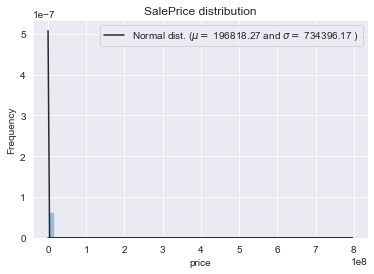

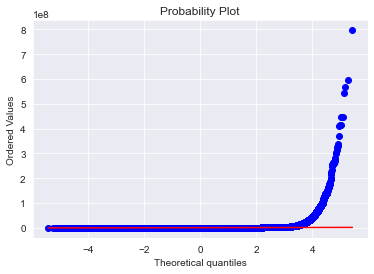

In [35]:
import seaborn as sns
from scipy.stats import norm, skew #for some statistics
from scipy import stats

color = sns.color_palette()
sns.set_style('darkgrid')

sns.distplot(df['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()


 mu = 11.81 and sigma = 0.82



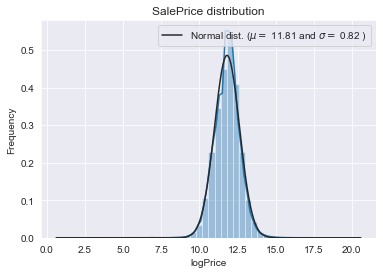

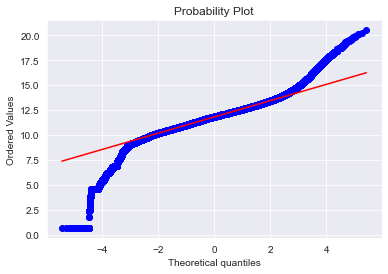

In [36]:

df["logPrice"] = np.log1p(df["price"])

#Check the new distribution 
sns.distplot(df['logPrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['logPrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['logPrice'], plot=plt)
plt.show()

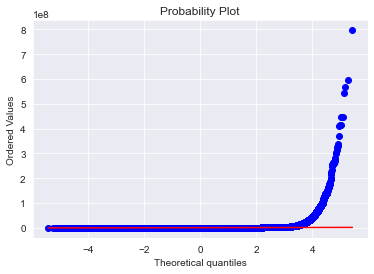

In [54]:
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

In [37]:
df

,price,date,ptype,duration,town,isLondon,year,logPrice
0,42000,1995-12-21,S,F,NEWCASTLE UPON TYNE,0,1995,10.645449
1,95000,1995-03-03,S,F,GRAYS,0,1995,11.461643
2,74950,1995-10-03,D,F,MIDDLEWICH,0,1995,11.224590
3,43500,1995-11-14,S,F,BILLINGHAM,0,1995,10.680539
4,63000,1995-09-08,S,F,CLEATOR MOOR,0,1995,11.050906
...,...,...,...,...,...,...,...,...
25180678,325000,2020-01-03,D,F,LUDLOW,0,2020,12.691584
25180679,140000,2020-01-03,S,F,TELFORD,0,2020,11.849405
25180680,125000,2020-01-10,T,F,SHREWSBURY,0,2020,11.736077
25180681,175100,2020-01-24,S,F,NEWPORT,0,2020,12.073118


In [ ]:
y_pred = model.predict(x_test)
print('RMSLE: %f'
  % sqrt(mean_squared_log_error(y_test, y_pred)))

In [ ]:
if __name__ == "__main__":

    SELECT_COLUMN = [1,2,4,6,11] # We only consider price, date of the purchase, property type, lease duration and town
    df = pd.read_csv("data/pp-complete.csv", names=["price", "date", "ptype", "duration", "town"], sep=",", usecols=SELECT_COLUMN)

    for c in ['duration', 'ptype']:
        df[c] = df[c].astype('category')
        df[c] = df[c].cat.codes

    df['isLondon'] = [1 if i == "LONDON" else 0 for i in df['town']]
    df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')
    df["year"] = df['date'].dt.year

    # Split the data into training/testing sets
    df_train = df[df.date < "2016-1-1"]
    df_test = df[df.date >= "2016-1-1"]
    #df_test = df_test[df.date < "2017-1-1"]
    x_train = df_train[['ptype', 'duration', 'isLondon']].values
    y_train = df_train['price'].values

    x_test = df_test[['ptype', 'duration', 'isLondon']].values
    y_test = df_test['price'].values


    # define the model
    def baseline():
        # create model
        model = Sequential()
        model.add(Dense(3, input_dim=3, activation='relu'))
        model.add(Dense(1))
        # Compile model
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model
    model = baseline()
    for i in range(10):
        model.fit(x_train, y_train, batch_size=128)
        results = model.evaluate(x_test, y_test, batch_size=128, verbose=0)
        print("mse:", results)
        #y_pred = model.predict(x_train)
        #print('Mean squared error: %.2f'
        #      % mean_squared_error(y_train, y_pred))

In [ ]:
K.log1p

In [ ]:
for i in range(3):
    model.fit(x_train, y_train, batch_size=512)
#     y_pred = model.predict(x_train)
    results = model.evaluate(x_test, y_test, batch_size=512, verbose=0)
    print("mse:", results)
#     print('Mean squared error: %.2f'
#           % mean_squared_error(y_train, y_pred))

In [ ]:
y_pred = model.predict(x_train)
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_pred))

In [ ]:
# Create linear regression model
lr = linear_model.LinearRegression()
# Train the model using the training set
lr.fit(x_train, y_train)
# Make predictions using the testing set
y_pred = lr.predict(x_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

In [ ]:
3112571893367.58

3072782252693.90
112481184635.64

In [ ]:

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, [df.price.mean()]*len(y_test)))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
pipe = Pipeline([
('sc',StandardScaler()),
('poly',PolynomialFeatures(include_bias=True)),
('reg',LinearRegression())
])
model = GridSearchCV(pipe,param_grid={'poly__degree':[2,3]})
model.fit(x_train, y_train)
degree = model.best_params_
print(degree)
pred = np.exp(model.predict(x_test))
Accuracy = sqrt(mse(y_test, pred))
print('=='*20+'RMSE: '+str(Accuracy)+'=='*20)
RMSE.append(Accuracy)

In [ ]:
Accuracy = mse(y_test, model.predict(x_test))
print('=='*20+'RMSE: '+str(Accuracy)+'=='*20)


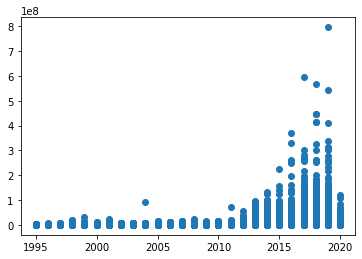

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df['year'] , df['price'])

In [ ]:
plt.scatter(df['duration'] , df['price'])

In [ ]:
plt.hist(df['ptype'])

In [ ]:
plt.scatter(df['ptype'] , df['price'])

In [ ]:
plt.scatter(df['isLondon'] , df['price'])